<a href="https://colab.research.google.com/github/sujaypatole/deep_learning_etlhive/blob/main/Deep_Learning_Session_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Regression

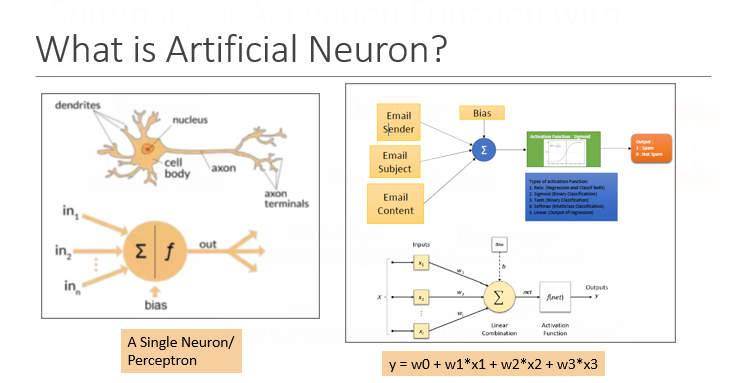

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

### Step 1 - Data Ingestion

In [2]:
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/PowerPlant.csv"
url

'https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/PowerPlant.csv'

In [3]:
import pandas as pd
df = pd.read_csv(url)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


### Step 2 - Perform basic data quality check

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


1. AT - Atmospheric Temperture in degree celsius
2. V - Vacuum Pressure bars
3. AP - Atomospheric Pressure bars
4. RH - Relative Humidity %
5. PE (Target) - Power Output in Mega Watt

In [5]:
df.isna().sum() # Check for missing values

,0
AT,0
V,0
AP,0
RH,0
PE,0


In [6]:
df.duplicated().sum() # Check for duplicate rows

41

In [7]:
#Drop duplicate rows and reset index
df = df.drop_duplicates(keep="first").reset_index(drop=True)

In [8]:
df.shape

(9527, 5)

In [9]:
df

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9522,15.12,48.92,1011.80,72.93,462.59
9523,33.41,77.95,1010.30,59.72,432.90
9524,15.99,43.34,1014.20,78.66,465.96
9525,17.65,59.87,1018.58,94.65,450.93


### Step 3 - Separate X and Y (PE)

In [10]:
X = df.drop(columns=["PE"])
Y = df[["PE"]]

In [11]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [12]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


### Step 4 - Apply Preprocessing on X

In [13]:
X.dtypes # Check data types of X

,0
AT,float64
V,float64
AP,float64
RH,float64


In [14]:
# Since there is no object data type we will continue with numeric pipeline
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [15]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
).set_output(transform="pandas")

In [16]:
X_pre = num_pipe.fit_transform(X)
X_pre

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837
...,...,...,...,...
9522,-0.609648,-0.423583,-0.241925,-0.027724
9523,1.847362,1.864831,-0.494441,-0.932100
9524,-0.492776,-0.863450,0.162101,0.364561
9525,-0.269777,0.439598,0.899448,1.459261


### Step 5 - Train Test Split

In [17]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [18]:
xtrain.head()

,AT,V,AP,RH
5695,-0.152905,0.324507,0.089713,1.817999
7300,-1.497611,-1.153542,0.323712,0.908830
9066,-0.885038,-0.954892,0.293410,0.988245
6424,1.398679,1.223949,-0.479290,-1.082031
6773,-0.824586,-0.942279,0.796758,1.506499


In [19]:
ytrain.head()

,PE
5695,446.68
7300,483.54
9066,461.71
6424,437.38
6773,463.71


In [20]:
xtest.head()

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6308,-1.501641,-1.244984,0.044260,-0.467246
8021,-1.465370,-1.418408,0.399466,-1.082031
9483,0.150695,0.648495,0.731104,-0.002393
4459,-0.036032,1.128565,-0.361449,1.586599


In [21]:
ytest.head()

,PE
1087,429.38
6308,485.29
8021,480.40
9483,452.30
4459,446.47


In [22]:
xtrain.shape

(7621, 4)

In [23]:
xtest.shape

(1906, 4)

In [24]:
xtrain.shape[1]

4

### Step 6 - Build the neural network

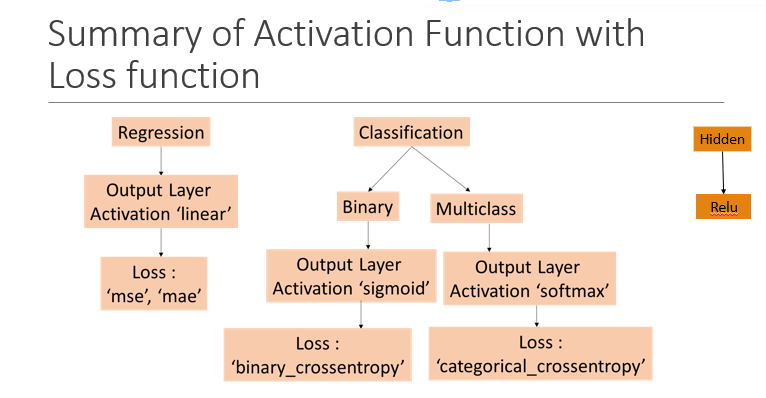

In [25]:
from keras.models import Sequential
from keras.layers import Input, Dense

In [26]:
model = Sequential(
    [
        Input(shape=(xtrain.shape[1],)),
        Dense(8, activation="relu"),
        Dense(4, activation="relu"),
        Dense(1, activation="linear")
    ]
)

In [27]:
model.summary() # Use summary function not attribute

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(loss="mse", optimizer="adam", metrics=["mae"])

In [29]:
hist = model.fit(xtrain, ytrain, epochs=60, validation_split=0.2)

Epoch 1/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 206249.8906 - mae: 453.8492 - val_loss: 202802.4844 - val_mae: 450.0647
Epoch 2/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 201755.1719 - mae: 448.9279 - val_loss: 190091.6875 - val_mae: 435.8378
Epoch 3/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 184741.1562 - mae: 429.5995 - val_loss: 160236.5000 - val_mae: 399.8006
Epoch 4/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 150291.4531 - mae: 386.5328 - val_loss: 117069.0547 - val_mae: 338.3185
Epoch 5/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 106175.2578 - mae: 319.7731 - val_loss: 75289.5078 - val_mae: 259.3000
Epoch 6/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 66662.4062 - mae: 239.7660 - val_loss: 47226.2070 - val_mae: 193.9878
Epoch 7/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 42451.0469 - mae: 182.6026 - val_loss: 31605.0078 - val_mae: 154.7639
Epoch 8/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 29320.4199 - mae: 148

### Check Learning Curve

In [30]:
import matplotlib.pyplot as plt

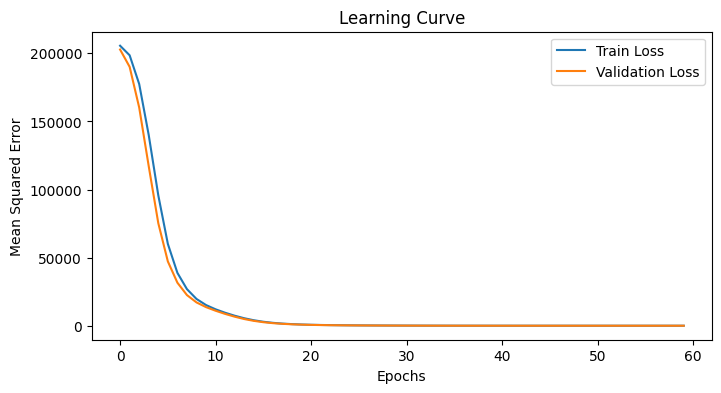

In [31]:
plt.figure(figsize=(8,4))
plt.plot(hist.history["loss"], label="Train Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve")
plt.legend()
plt.show()

### Model Evaluation

In [32]:
model.evaluate(xtrain, ytrain)

239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 21.4433 - mae: 3.6732


[21.46756935119629, 3.6589877605438232]

In [33]:
model.evaluate(xtest, ytest)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.0738 - mae: 3.5883


[21.394817352294922, 3.687296152114868]

In [34]:
from sklearn.metrics import(
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

In [35]:
def evaluate_model(model, x, y):
  ypred = model.predict(x)
  rmse = root_mean_squared_error(y, ypred)
  mae = mean_absolute_error(y, ypred)
  mape = mean_absolute_percentage_error(y, ypred)
  r2 = r2_score(y, ypred)

  print(f"RMSE: {rmse:.2f}")
  print(f"MAE: {mae:.2f}")
  print(f"MAPE: {mape:.2%}")
  print(f"R2: {r2:.2%}")

In [36]:
print("Train Results :")
evaluate_model(model, xtrain, ytrain)

Train Results :
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
RMSE: 4.63
MAE: 3.66
MAPE: 0.81%
R2: 92.53%


In [37]:
print("Test Results : ")
evaluate_model(model, xtest, ytest)

Test Results : 
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
RMSE: 4.63
MAE: 3.69
MAPE: 0.81%
R2: 92.91%


In [38]:
ypred_test = model.predict(xtest)
ypred_test[0:5]

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[427.4742 ],
       [481.08542],
       [482.52713],
       [450.78952],
       [448.2651 ]], dtype=float32)

In [39]:
ytest.head()

,PE
1087,429.38
6308,485.29
8021,480.40
9483,452.30
4459,446.47


### R2 score > 0.8 hence it is a good model

### Out of Sample Prediction

In [40]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_PowerPlant.csv"
print(url2)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_PowerPlant.csv


In [41]:
xnew = pd.read_csv(url2)
xnew.head()

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [42]:
xnew.shape

(100, 4)

In [43]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [44]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.380410,0.356827,-0.590397,0.811615
1,1.238819,0.047028,-1.023041,-1.830315
2,1.105826,1.491180,-2.006171,0.858853
3,0.810286,0.628000,-0.312629,0.051007
4,-1.007284,-1.062888,2.113209,-0.161908


In [45]:
preds = model.predict(xnew_pre)
preds[0:5]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


array([[445.8618 ],
       [439.62595],
       [431.2889 ],
       [440.55338],
       [473.56494]], dtype=float32)

In [46]:
xnew["PE_pred"] = preds

In [47]:
xnew = xnew.round(2)

In [48]:
xnew

,AT,V,AP,RH,PE_pred
0,22.49,58.82,1009.73,85.19,445.859985
1,28.88,54.89,1007.16,46.60,439.630005
2,27.89,73.21,1001.32,85.88,431.290009
3,25.69,62.26,1011.38,74.08,440.549988
4,12.16,40.81,1025.79,70.97,473.559998
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,437.980011
96,11.78,39.96,1011.37,82.95,471.640015
97,5.62,41.38,1020.91,86.21,483.739990
98,24.96,74.99,1008.25,80.52,438.010010


In [49]:
xnew.to_csv("Results.csv", index=False)